# INSTALL LIBRARIES

In [1]:
!pip install mlflow==2.13.2 sagemaker-mlflow==0.1.0

# LOAD LIBRARIES

In [2]:
import mlflow
import mlflow.xgboost
import xgboost as xgb
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import os

# SETTINGS

In [3]:
mlflow_arn = "arn:aws:sagemaker:eu-west-1:211125740051:mlflow-tracking-server/Sample-server"
mlflow_experiment_name = "02-sample-experiment"

# SET MLFLOW

In [4]:
mlflow.set_tracking_uri(mlflow_arn)
mlflow.set_experiment(mlflow_experiment_name)

<Experiment: artifact_location='s3://sagemaker-bucket-ds/ML_FLOW/35', creation_time=1719996896821, experiment_id='35', last_update_time=1719996896821, lifecycle_stage='active', name='02-sample-experiment', tags={}>

# LOAD DATA

In [5]:
# Load Diabetes dataset
data = load_diabetes()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# BUILD A MODEL

In [6]:
# Create and train model
model = xgb.XGBRegressor(n_estimators=100, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# SAVE A CHART

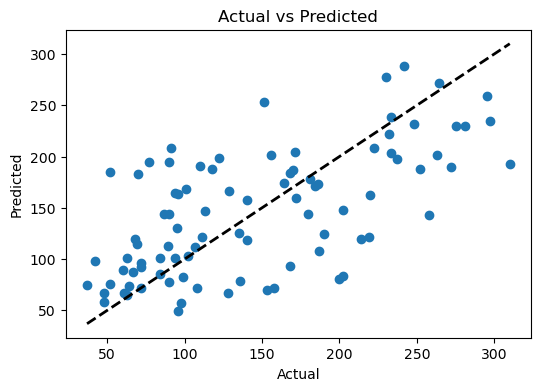

In [7]:
# Create and log residuals plot as an artifact
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
residuals_plot_file = "residuals_plot.png"
plt.savefig(residuals_plot_file)

In [8]:
# Start a new MLflow run
with mlflow.start_run() as run:
    run_id = run.info.run_id
    print(f"Run ID: {run_id}")

    # Log parameters directly from the model
    params = model.get_params()
    for param, value in params.items():
        mlflow.log_param(param, value)

    # Log metrics
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)

    mlflow.set_tag("model_type", "xgboost")

    # Log the model
    mlflow.xgboost.log_model(model, "model")

    # Log residuals plot as an artifact
    mlflow.log_artifact(residuals_plot_file)

    # Log a sample input
    sample_input = X_test[0]
    input_df = pd.DataFrame([sample_input], columns=data.feature_names)
    input_file = "sample_input.csv"
    input_df.to_csv(input_file, index=False)
    mlflow.log_artifact(input_file)

    # Remove temporary files
    os.remove(residuals_plot_file)
    os.remove(input_file)

print("Logging completed.")

Run ID: 4c1e982d84d244f2af7737bbdfa0af73
Logging completed.


# BUILD ONE MORE MODEL WITH CUSTOM NAME

Run ID: 5a73b9c775394275a26954d79efbcb82


/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:11: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Logging completed.


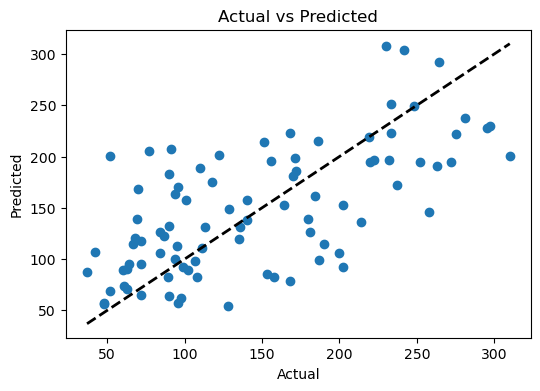

In [9]:
# Create and train model
model = xgb.XGBRegressor(n_estimators=100, max_depth=2, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create and log residuals plot as an artifact
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
residuals_plot_file = "residuals_plot.png"
plt.savefig(residuals_plot_file)

# Start a new MLflow run
with mlflow.start_run(run_name = "my-custom-name") as run:
    run_id = run.info.run_id
    print(f"Run ID: {run_id}")

    # Log parameters directly from the model
    params = model.get_params()
    for param, value in params.items():
        mlflow.log_param(param, value)

    mlflow.set_tag("model_type", "xgboost")

    # Log metrics
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)

    # Log the model
    mlflow.xgboost.log_model(model, "model")

    # Log residuals plot as an artifact
    mlflow.log_artifact(residuals_plot_file)

    # Log a sample input
    sample_input = X_test[0]
    input_df = pd.DataFrame([sample_input], columns=data.feature_names)
    input_file = "sample_input.csv"
    input_df.to_csv(input_file, index=False)
    mlflow.log_artifact(input_file)

    # Remove temporary files
    os.remove(residuals_plot_file)
    os.remove(input_file)

print("Logging completed.")